In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (16, 3)

In [2]:
import sys
import os
import time
import numpy as np
import tensorflow as tf
import gpflow
import soundfile
import pickle
sys.path.append('../../../../../')
import gpitch
from gpitch.amtgp import logistic
from gpitch import myplots
import soundfile
import peakutils
from scipy import signal
from scipy.fftpack import fft, ifft, ifftshift
from scipy import signal

In [3]:
visible_device = sys.argv[1]  # configure gpu usage
gpitch.amtgp.init_settings(visible_device=visible_device, interactive=False)

In [18]:
pickleloc = '../../../../../../results/files/svi/script/loo88/loo2/'  # location saved models
filename = '../../../../../../datasets/maps/test_data/MAPS_MUS-bach_846_AkPnBcht_mono.wav'  # loc test dat
bounds = [21, 109]  # pitches to detect
midi = np.asarray([str(i) for i in range(bounds[0], bounds[1])]).reshape(-1,)  # list
Np = midi.size
fs = 16e3
#'../../../../../../results/files/svi/script/loo88/100.p'

In [19]:

# models = [pickle.load(open(pickleloc +"prediction_pitch_"+ midi[i] + ".p", "rb"))
#           for i in range(Np)]

models = [pickle.load(open(pickleloc +"prediction_pitch_15_secs"+ midi[i] + ".p", "rb"))
          for i in range(Np)]

In [20]:
y, fs = soundfile.read(filename)
y = y.reshape(-1, 1)
Ntest = y.size
x = np.linspace(0, (Ntest-1.)/fs, Ntest).reshape(-1, 1)

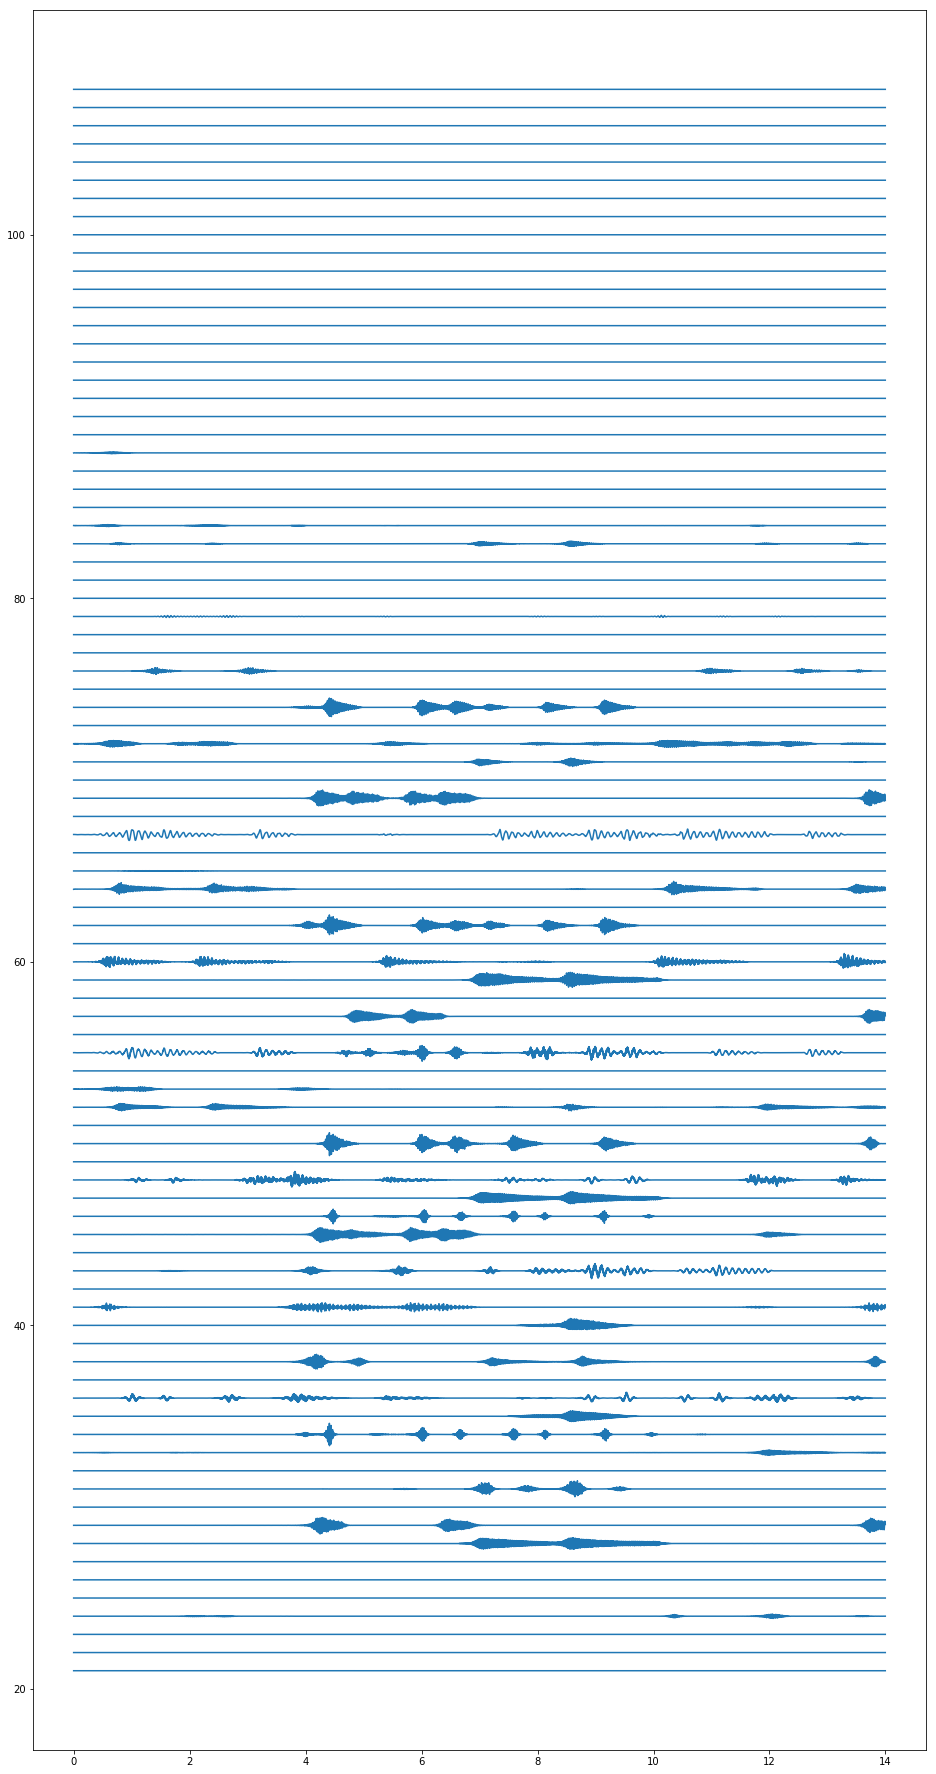

In [23]:
plt.figure(figsize=(16, 32))
pr = np.zeros((88, 5600))
pr_act = np.zeros((88, 5600))
for i in range(88):
    com_pitch = models[i][0][0].copy()
    act_pitch = logistic(models[i][2][0].copy())
    sou_pitch = act_pitch * com_pitch
    pr[i, :] = sou_pitch
    pr_act[i, :] = act_pitch
    plt.plot(x[::40], int(midi[i]) + sou_pitch, 'C0')
    #plt.ylim([-1, 1])
plt.savefig('first_pr_ever.eps')

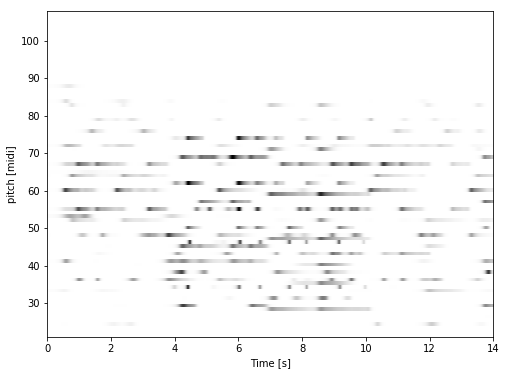

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(pr_act, origin='lower', cmap='binary', extent=(0, x[-1], 21, 108))
plt.axis('tight')
plt.ylabel('pitch [midi]')
plt.xlabel('Time [s]');